In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download("stopwords")
nltk.download("punkt")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import json
from kafka import KafkaConsumer
from kafka import KafkaProducer
from json import loads
import time

import river
from river import cluster
from river import stream
from river import metrics
from river.stream import iter_pandas

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chaima\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
topic_eng = 'en-tweets-proj'
topic_fr = 'fr-tweets-proj'

topic = 'Data_Stream_Project'
counter=0

In [3]:
consumer = KafkaConsumer( bootstrap_servers="localhost:9092", value_deserializer=lambda x: json.loads(x.decode("utf8")),)
topics_list =[topic]

consumer.subscribe(topics= topics_list)
print(consumer.bootstrap_connected())

True


In [4]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [6]:
from math import pi

In [7]:
def convert_to_radian(x):
    return((x / (24 * 60)) * 2 * pi)
rad_function = np.vectorize(convert_to_radian)
def evaluate(stream, model, n_wait=1000, verbose=False):
    raw_results = []
    model_name = model.__class__.__name__
    silhouette_score = metrics.Silhouette()
    for i, x in enumerate(stream):
        model = model.learn_one(x[0])
        y_pred = model.predict_one(x[0])
        if model==dbstream:
            if model.n_clusters>1:
                # We have to determine dbstream centers
                points_rad = rad_function(list(x[0]))
                #generate distance matrix from each point
                dist = points_rad[None,:] - points_rad[:, None]
                #Assign shortest distances from each point
                dist[((dist > pi) & (dist <= (2*pi)))] = dist[((dist > pi) & (dist <= (2*pi)))] -(2*pi)
                dist[((dist > (-2*pi)) & (dist <= (-1*pi)))] = dist[((dist > (-2*pi)) & (dist <= (-1*pi)))] + (2*pi) 
                dist = abs(dist)
                centers = []
                for i in range(model.n_clusters):
                    points_of_cluster_i = dist[y_pred==i,:]
                    centroid_of_cluster_i = np.mean(points_of_cluster_i, axis=0) 
                    centers.append(centroid_of_cluster_i)
                    centers = dict(zip(np.arange(len(centers)), centers))
                    silhouette_score = silhouette_score.update(x[0], y_pred, centers)                
        else:
            silhouette_score = silhouette_score.update(x[0], y_pred, model.centers)
    if model.n_clusters > 1: 
        print("Silhouette score : ", silhouette_score.get())
        raw_results.append(silhouette_score.get())
    else:
        print("Silhouette score : ", 0)
        raw_results.append(0)
    return (raw_results)

In [8]:
k_means = cluster.KMeans(n_clusters=3, halflife=0.1, sigma=3, seed=42)

In [9]:
streamkmeans = cluster.STREAMKMeans(chunk_size=3, n_clusters=3, halflife=0.5, sigma=1.5, seed=0)

In [10]:
dbstream = cluster.DBSTREAM(clustering_threshold = 1.5,fading_factor = 0.05,cleanup_interval = 4,
                             intersection_factor = 0.5,minimum_weight = 1)

k_means results:-----------
Silhouette score :  0.5313851940540579
STREAMKmeans results:-----------
Silhouette score :  0.3756194421334292
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.3036879465359107
STREAMKmeans results:-----------
Silhouette score :  0.37102763254732907
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.19083066118330547
STREAMKmeans results:-----------
Silhouette score :  0.34623690648314226
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.11832602834546949
STREAMKmeans results:-----------
Silhouette score :  0.6201020480856112
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.07762954883905486
STREAMKmeans results:-----------
Silhouette score :  0.6652386904234405
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score 

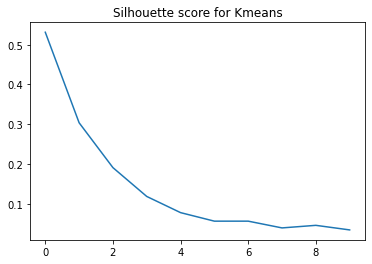

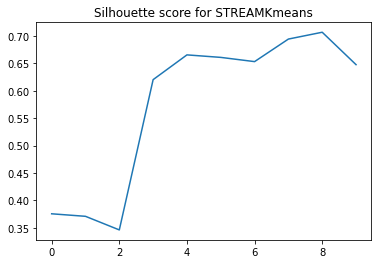

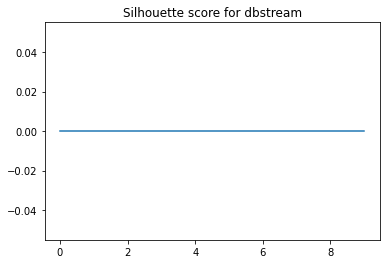

k_means results:-----------
Silhouette score :  0.037562238660553235
STREAMKmeans results:-----------
Silhouette score :  0.6637559653683874
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.024057091645796197
STREAMKmeans results:-----------
Silhouette score :  0.6630994332689187
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.02125840257339898
STREAMKmeans results:-----------
Silhouette score :  0.6463503566668137
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.02483874765346124
STREAMKmeans results:-----------
Silhouette score :  0.3720170392028575
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.022846437302593576
STREAMKmeans results:-----------
Silhouette score :  0.6351786376801208
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette sco

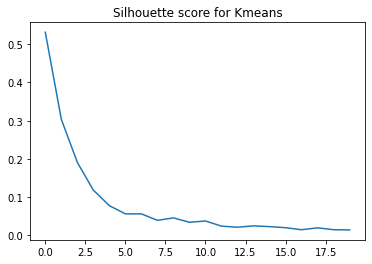

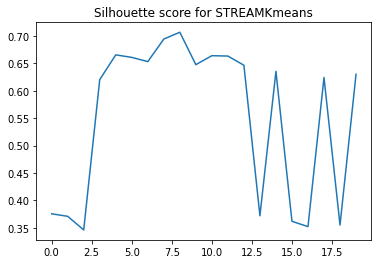

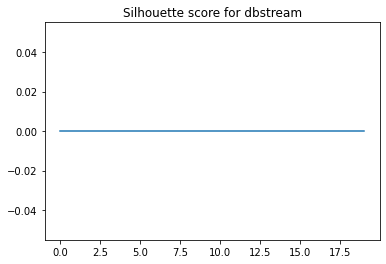

k_means results:-----------
Silhouette score :  0.016467959194420657
STREAMKmeans results:-----------
Silhouette score :  0.6526445922434922
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.015390303463443887
STREAMKmeans results:-----------
Silhouette score :  0.6400825529607648
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.013659390649538384
STREAMKmeans results:-----------
Silhouette score :  0.6549469157717637
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.011680919814533192
STREAMKmeans results:-----------
Silhouette score :  0.6410417026007473
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.013658428963412635
STREAMKmeans results:-----------
Silhouette score :  0.6474634828189666
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette s

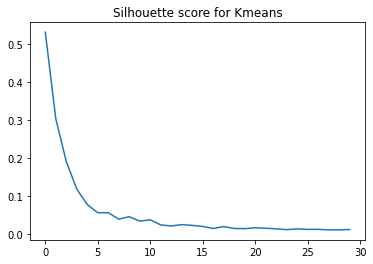

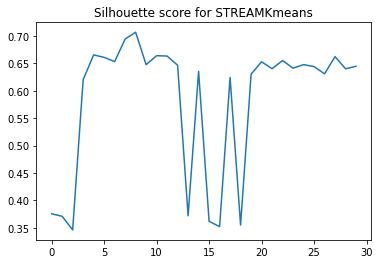

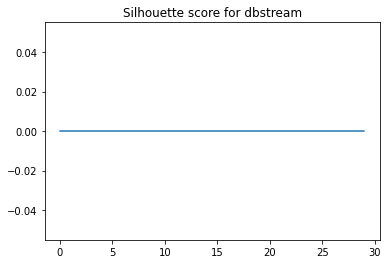

k_means results:-----------
Silhouette score :  0.010382418696014865
STREAMKmeans results:-----------
Silhouette score :  0.6510490526004735
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.01170745424141896
STREAMKmeans results:-----------
Silhouette score :  0.6446111371247598
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.011297793474767375
STREAMKmeans results:-----------
Silhouette score :  0.5245517025916491
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.010110513910118466
STREAMKmeans results:-----------
Silhouette score :  0.34609263133230994
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.009109926062300855
STREAMKmeans results:-----------
Silhouette score :  0.3427784642198527
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette s

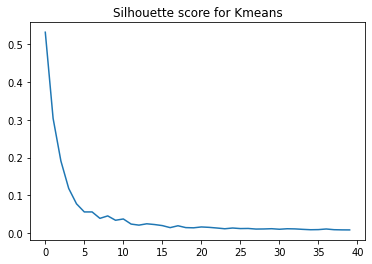

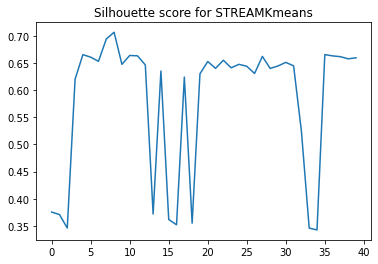

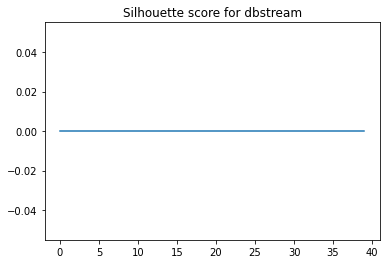

k_means results:-----------
Silhouette score :  0.010206973113053044
STREAMKmeans results:-----------
Silhouette score :  0.345706626765115
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.00928251703278916
STREAMKmeans results:-----------
Silhouette score :  0.34161668103843484
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.00916351062030088
STREAMKmeans results:-----------
Silhouette score :  0.339901647277071
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.007936338960220609
STREAMKmeans results:-----------
Silhouette score :  0.34038196820299677
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.00903570587899902
STREAMKmeans results:-----------
Silhouette score :  0.3367033448958319
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette scor

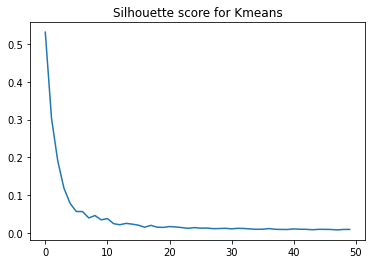

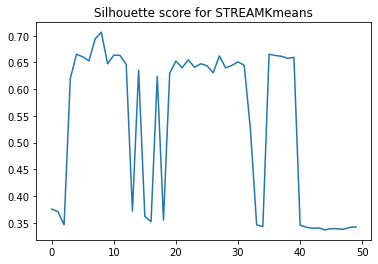

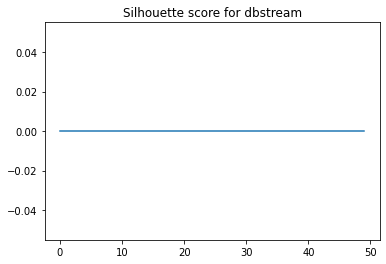

k_means results:-----------
Silhouette score :  0.008211921029788344
STREAMKmeans results:-----------
Silhouette score :  0.3427726875242621
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.0077960026128929645
STREAMKmeans results:-----------
Silhouette score :  0.34215777921299184
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.008524637377256013
STREAMKmeans results:-----------
Silhouette score :  0.6601381568786
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.007889245169833522
STREAMKmeans results:-----------
Silhouette score :  0.6656199807036736
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.008252090894310383
STREAMKmeans results:-----------
Silhouette score :  0.6634541220972378
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette sc

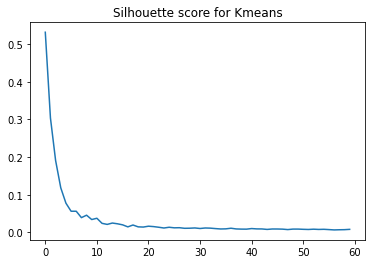

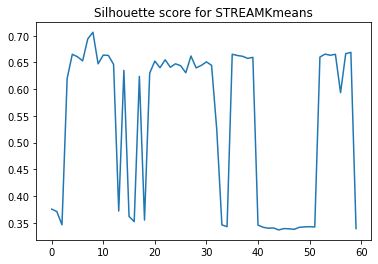

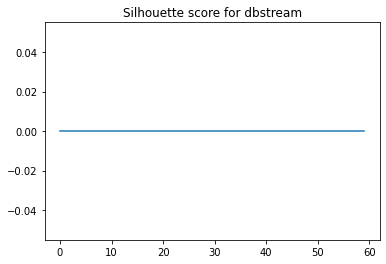

k_means results:-----------
Silhouette score :  0.007561823192572556
STREAMKmeans results:-----------
Silhouette score :  0.6670934324909306
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.007393660481893801
STREAMKmeans results:-----------
Silhouette score :  0.649781722872344
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.007136000100949498
STREAMKmeans results:-----------
Silhouette score :  0.6683859708069383
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.007409511041607119
STREAMKmeans results:-----------
Silhouette score :  0.3456261489110809
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.007106395364248233
STREAMKmeans results:-----------
Silhouette score :  0.3424390020167659
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette sc

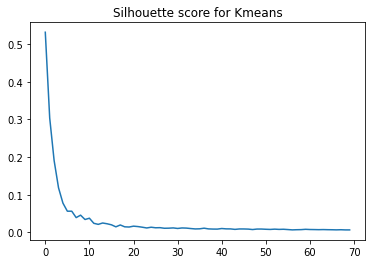

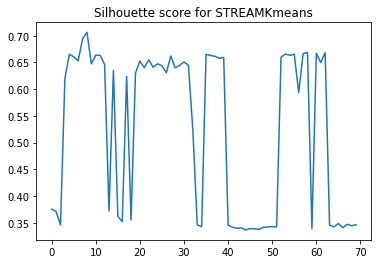

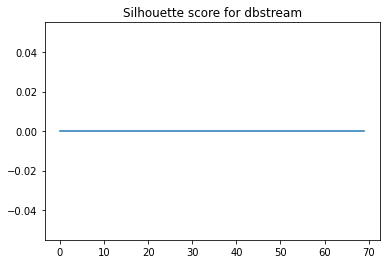

k_means results:-----------
Silhouette score :  0.007080219022347357
STREAMKmeans results:-----------
Silhouette score :  0.3448535514381039
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.0067592998216356144
STREAMKmeans results:-----------
Silhouette score :  0.3469035437576223
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.006936686532509028
STREAMKmeans results:-----------
Silhouette score :  0.3456215777577588
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.006707931908099784
STREAMKmeans results:-----------
Silhouette score :  0.34672033305992006
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.0067039314194474505
STREAMKmeans results:-----------
Silhouette score :  0.3415371798058878
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouett

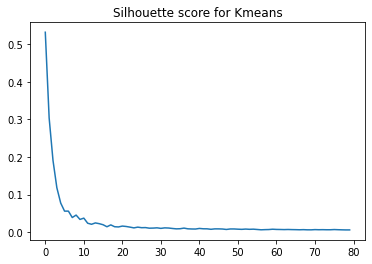

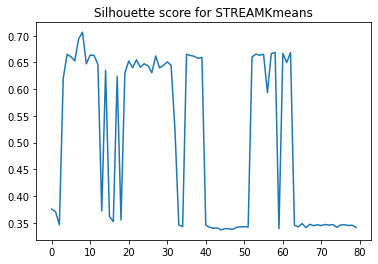

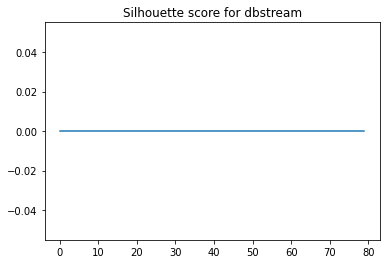

k_means results:-----------
Silhouette score :  0.006717652269845088
STREAMKmeans results:-----------
Silhouette score :  0.6644418574601566
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.006524959970939552
STREAMKmeans results:-----------
Silhouette score :  0.6647113358770315
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.006017752818042251
STREAMKmeans results:-----------
Silhouette score :  0.665829715116496
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.006014699878485933
STREAMKmeans results:-----------
Silhouette score :  0.3449328919667696
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette score :  0.005950439180797386
STREAMKmeans results:-----------
Silhouette score :  0.6512288911126056
DBSTREAM results:-----------
Silhouette score :  0
k_means results:-----------
Silhouette sc

KeyboardInterrupt: 

In [11]:
X=[]
y_pred = []
final_results_kmeans = []
final_results_streamkmeans= []
final_results_dbstream = []
for message in consumer:  
    if message.value['lang']=='en' or message.value['lang']=='fr':
        msg= message.value['text']
        X.append(msg)
        
        if len(X)%10==0:
            X_train_counts = count_vect.fit_transform(X)
            X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts).todense()
            print("k_means results:-----------")
            kmeans_results = evaluate(stream=iter_pandas(pd.DataFrame(X_train_tfidf)),model=k_means)
            final_results_kmeans.append(kmeans_results)
            
            print("STREAMKmeans results:-----------")
            stream_Kmeans_results = evaluate(stream=iter_pandas(pd.DataFrame(X_train_tfidf)),model=streamkmeans)
            final_results_streamkmeans.append(stream_Kmeans_results)
            
            print("DBSTREAM results:-----------")
            dbstream_results = evaluate(stream=iter_pandas(pd.DataFrame(X_train_tfidf)),model=dbstream)
            final_results_dbstream.append(dbstream_results)
        if len(X)%100==0:
            plt.plot(final_results_kmeans)
            plt.title("Silhouette score for Kmeans")
            plt.show()
            plt.plot(final_results_streamkmeans)
            plt.title("Silhouette score for STREAMKmeans")
            plt.show()
            plt.plot(final_results_dbstream)
            plt.title("Silhouette score for dbstream")
            plt.show()

- Remark : It took two hours and processed only 90 data samples (so I interrupted it because the curve of evolution of the silhouette coefficient in function of the number of processed data samples didn't is almost the same for the last 30 precessed samples)